In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('3) Sentiment dataset.csv')
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [17]:
print(f"Dataset Info:{df.info}")
print(f"Shape: {df.shape}")


Dataset Info:<bound method DataFrame.info of      Unnamed: 0.1  Unnamed: 0  \
0               0           0   
1               1           1   
2               2           2   
3               3           3   
4               4           4   
..            ...         ...   
727           728         732   
728           729         733   
729           730         734   
730           731         735   
731           732         736   

                                                  Text    Sentiment  \
0     Enjoying a beautiful day at the park!        ...   Positive     
1     Traffic was terrible this morning.           ...   Negative     
2     Just finished an amazing workout! 💪          ...   Positive     
3     Excited about the upcoming weekend getaway!  ...   Positive     
4     Trying out a new recipe for dinner tonight.  ...   Neutral      
..                                                 ...          ...   
727  Collaborating on a science project that receiv...       

In [8]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

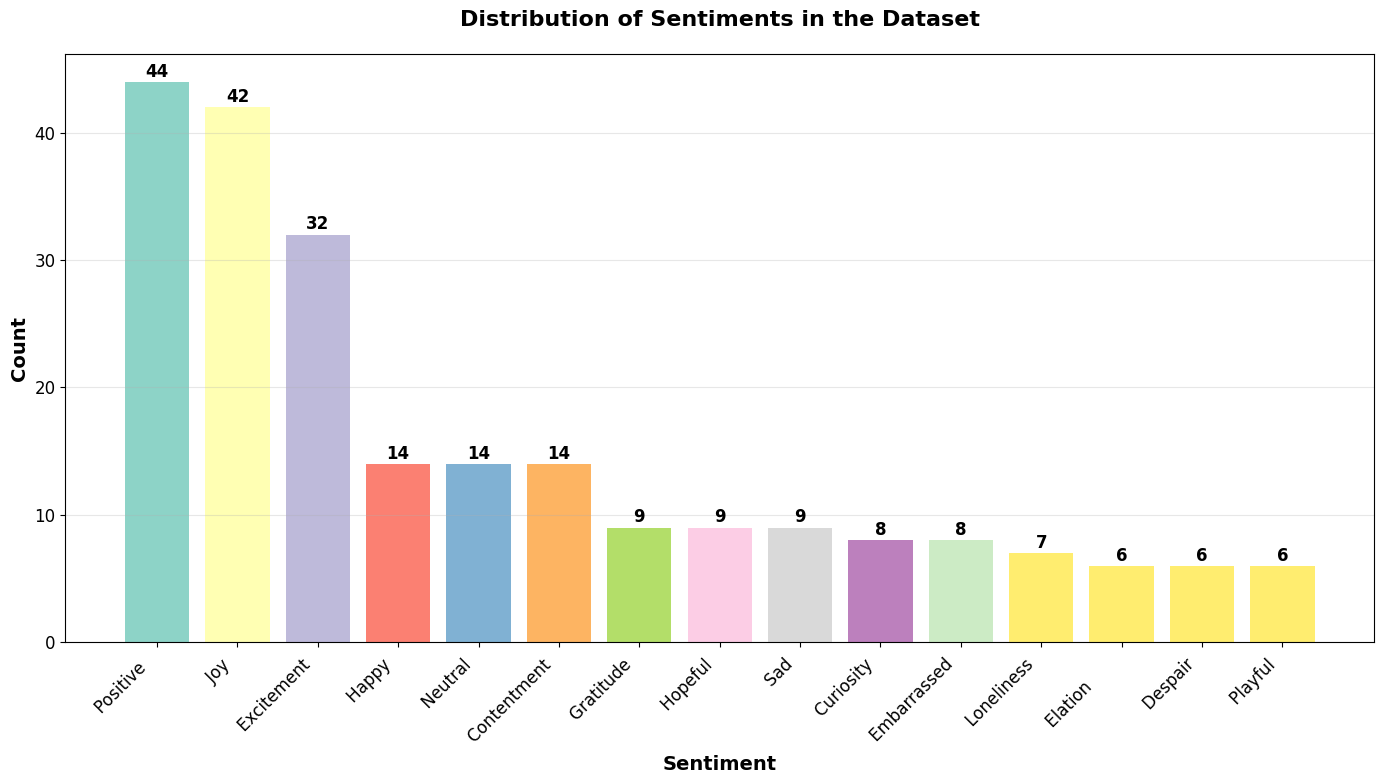

In [20]:
# 1. BAR PLOT: Distribution of Sentiments (IMPROVED)
plt.figure(figsize=(14, 8))
sentiment_counts = df['Sentiment'].value_counts().head(15)  # Top 15 sentiments

bars = plt.bar(range(len(sentiment_counts)), sentiment_counts.values,
               color=plt.cm.Set3(np.arange(len(sentiment_counts))))

plt.title('Distribution of Sentiments in the Dataset', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.xticks(range(len(sentiment_counts)), sentiment_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_distribution_improved.png', dpi=300, bbox_inches='tight')
plt.show()

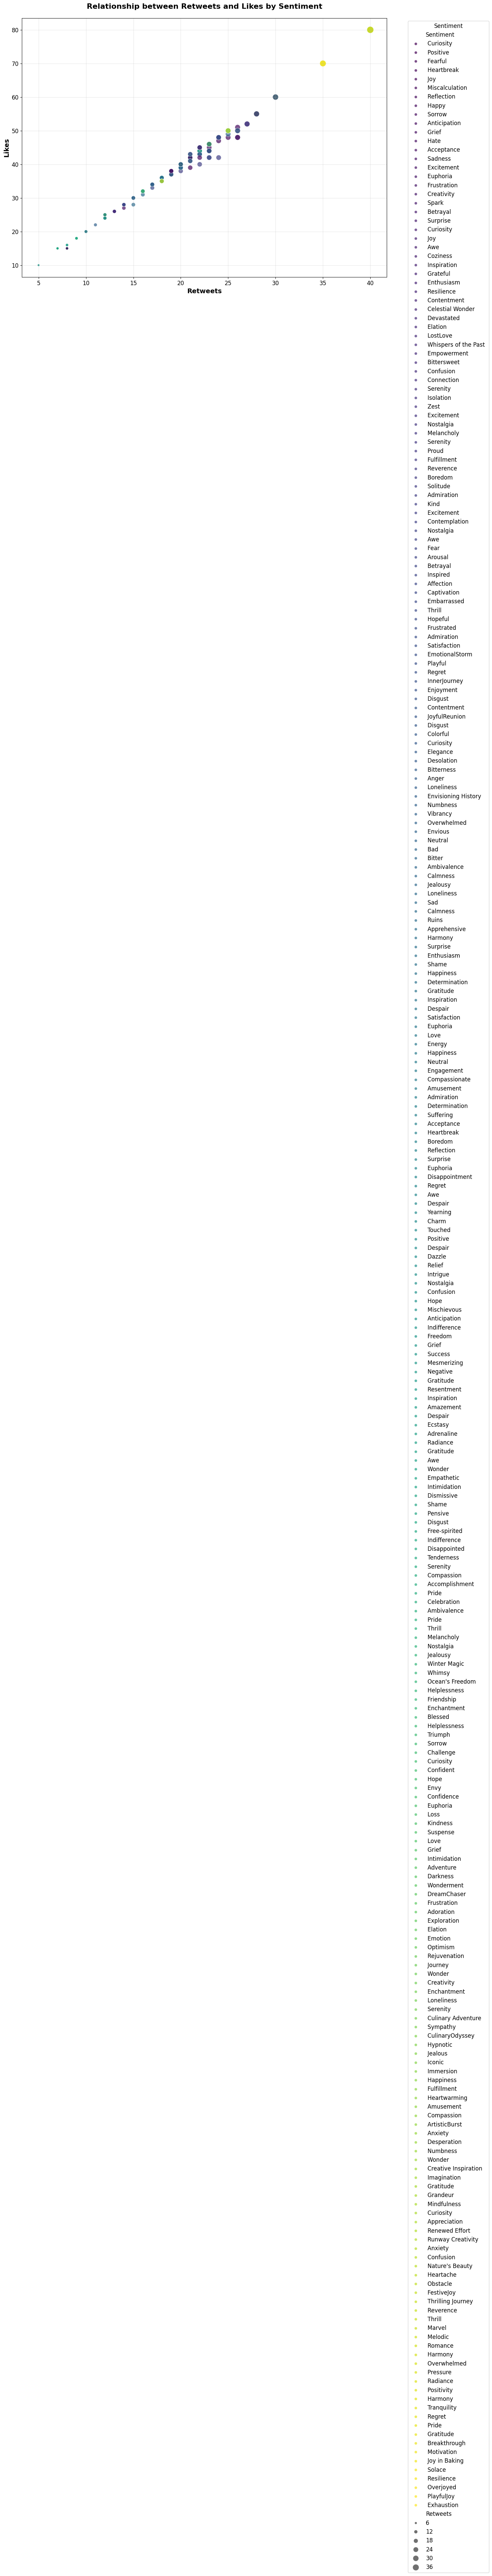

In [22]:
# 3. SCATTER PLOT: Relationship between Retweets and Likes (IMPROVED)
plt.figure(figsize=(14, 10))

# Sample data for better visualization (too many points can make it messy)
sample_df = df.sample(min(1000, len(df)), random_state=42)

scatter = sns.scatterplot(data=sample_df, x='Retweets', y='Likes',
                         hue='Sentiment', size='Retweets', sizes=(20, 200),
                         alpha=0.7, palette='viridis')

plt.title('Relationship between Retweets and Likes by Sentiment',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Retweets', fontsize=14, fontweight='bold')
plt.ylabel('Likes', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sentiment')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('retweets_vs_likes_improved.png', dpi=300, bbox_inches='tight')
plt.show()

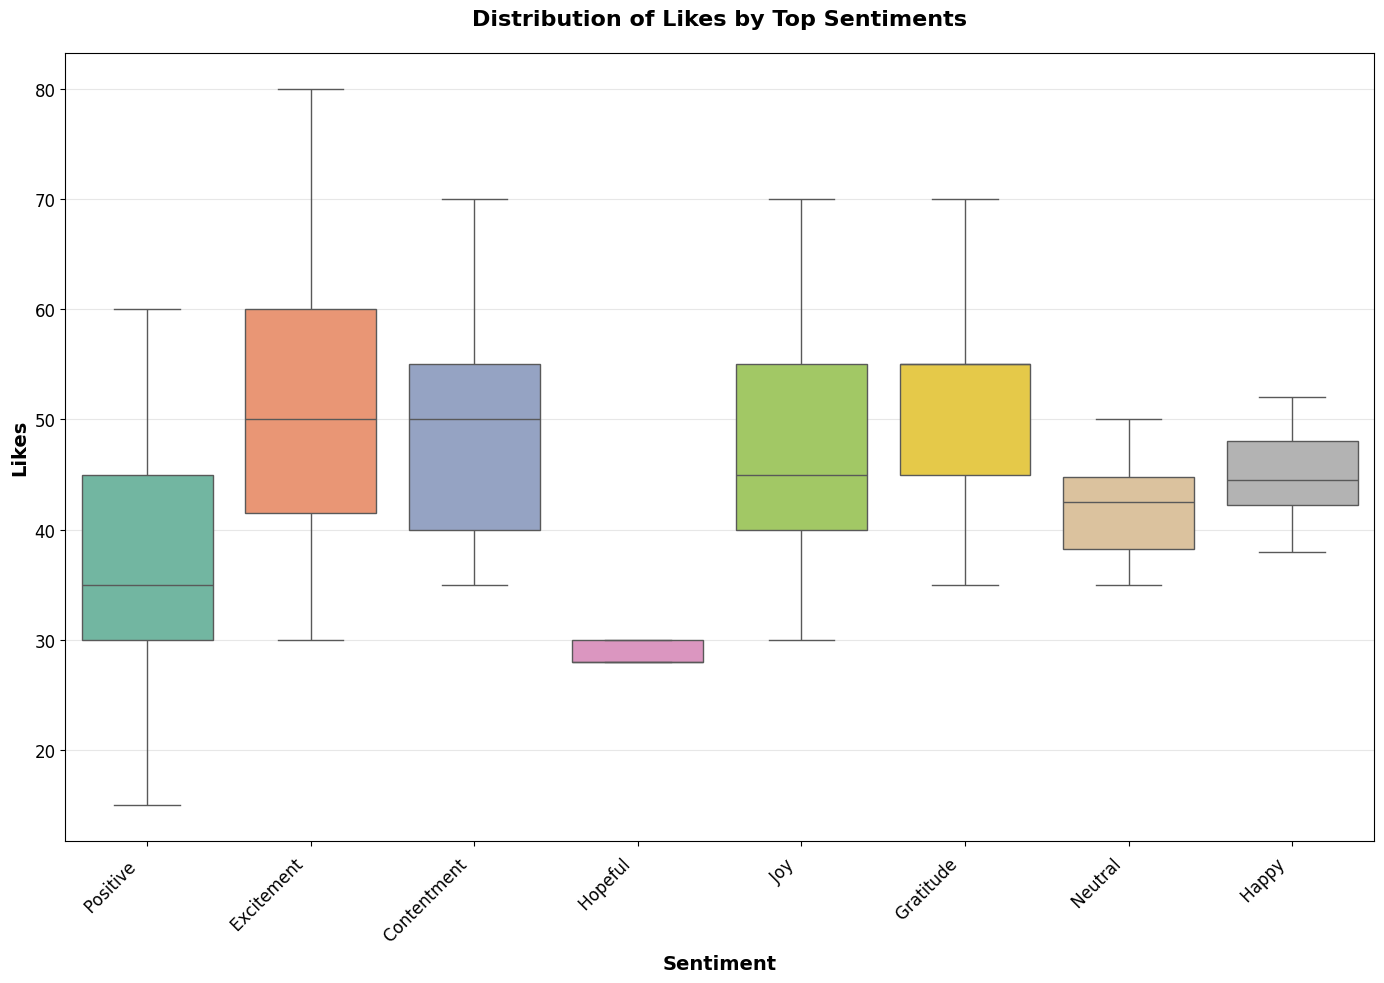

In [23]:
# 4. BOX PLOT: Distribution of Likes by Top Sentiments (IMPROVED)
plt.figure(figsize=(14, 10))
top_8_sentiments = sentiment_counts.head(8).index
filtered_df = df[df['Sentiment'].isin(top_8_sentiments)]

sns.boxplot(data=filtered_df, x='Sentiment', y='Likes',
            palette='Set2', showfliers=False)  # Remove outliers for better visualization

plt.title('Distribution of Likes by Top Sentiments', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment', fontsize=14, fontweight='bold')
plt.ylabel('Likes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('likes_by_sentiment_improved.png', dpi=300, bbox_inches='tight')
plt.show()

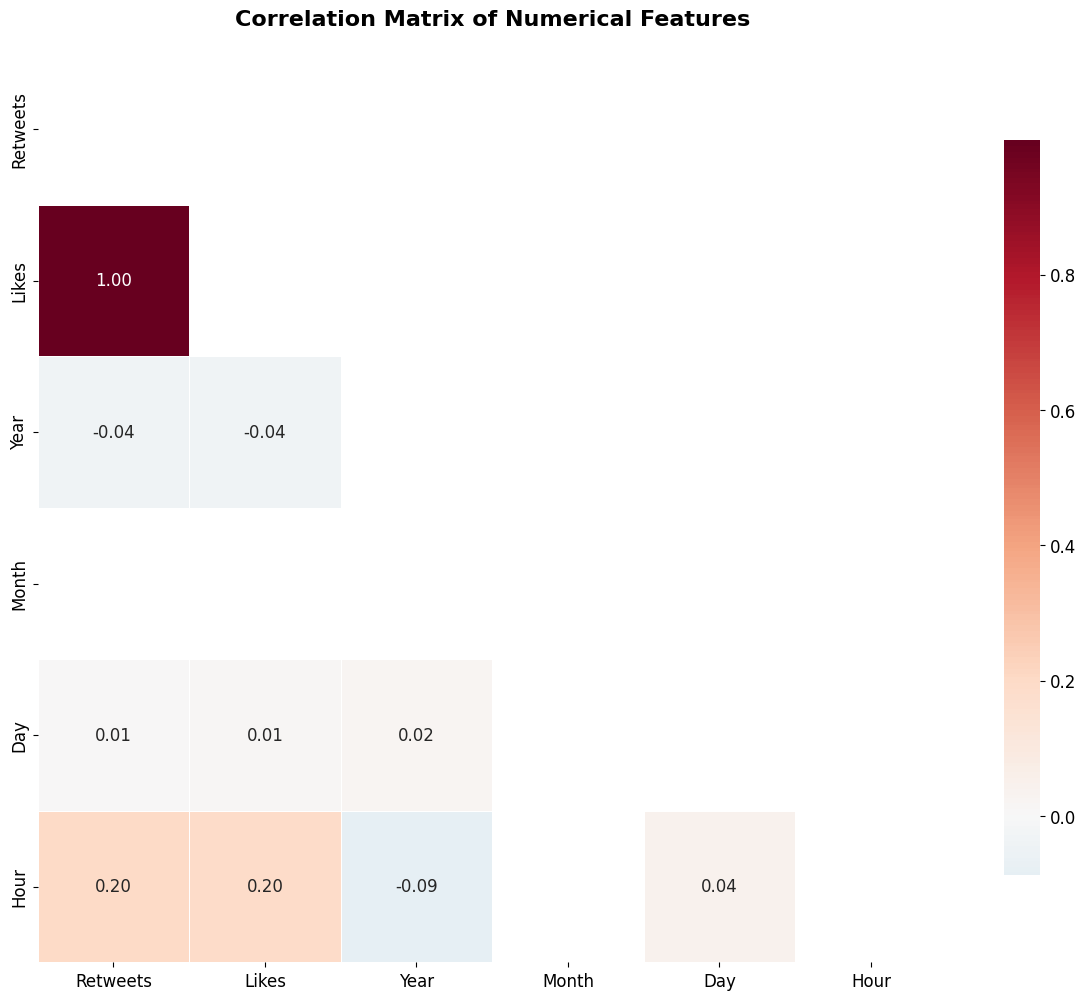

In [32]:


# Convert to numeric (important step)
for col in ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Correlation
numerical_cols = ['Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour']
numerical_cols = [c for c in numerical_cols if c in df.columns]
correlation_matrix = df[numerical_cols].corr()

# Mask upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, mask=mask, fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap_improved.png', dpi=300, bbox_inches='tight')
plt.show()


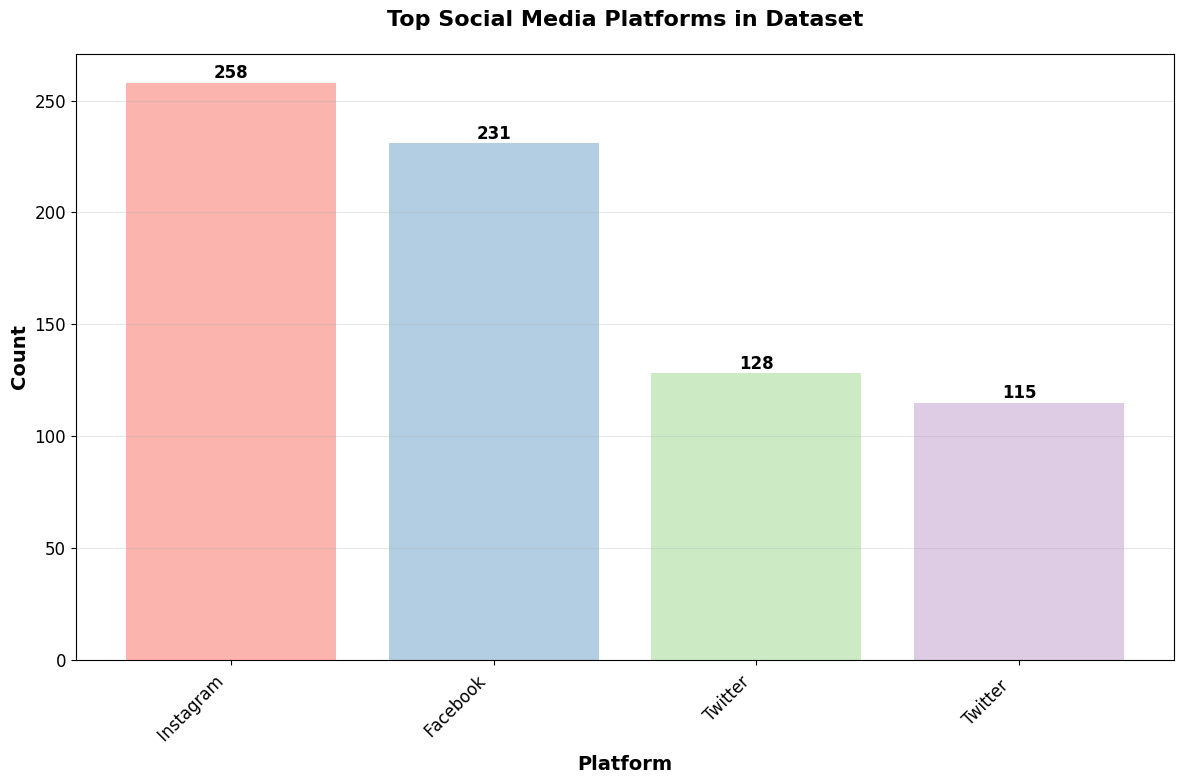

In [28]:
# 6. COUNT PLOT: Top Platforms (IMPROVED)
plt.figure(figsize=(12, 8))
platform_counts = df['Platform'].value_counts().head(8)

bars = plt.bar(range(len(platform_counts)), platform_counts.values,
               color=plt.cm.Pastel1(np.arange(len(platform_counts))))

plt.title('Top Social Media Platforms in Dataset', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Platform', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.xticks(range(len(platform_counts)), platform_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('platform_distribution_improved.png', dpi=300, bbox_inches='tight')
plt.show()

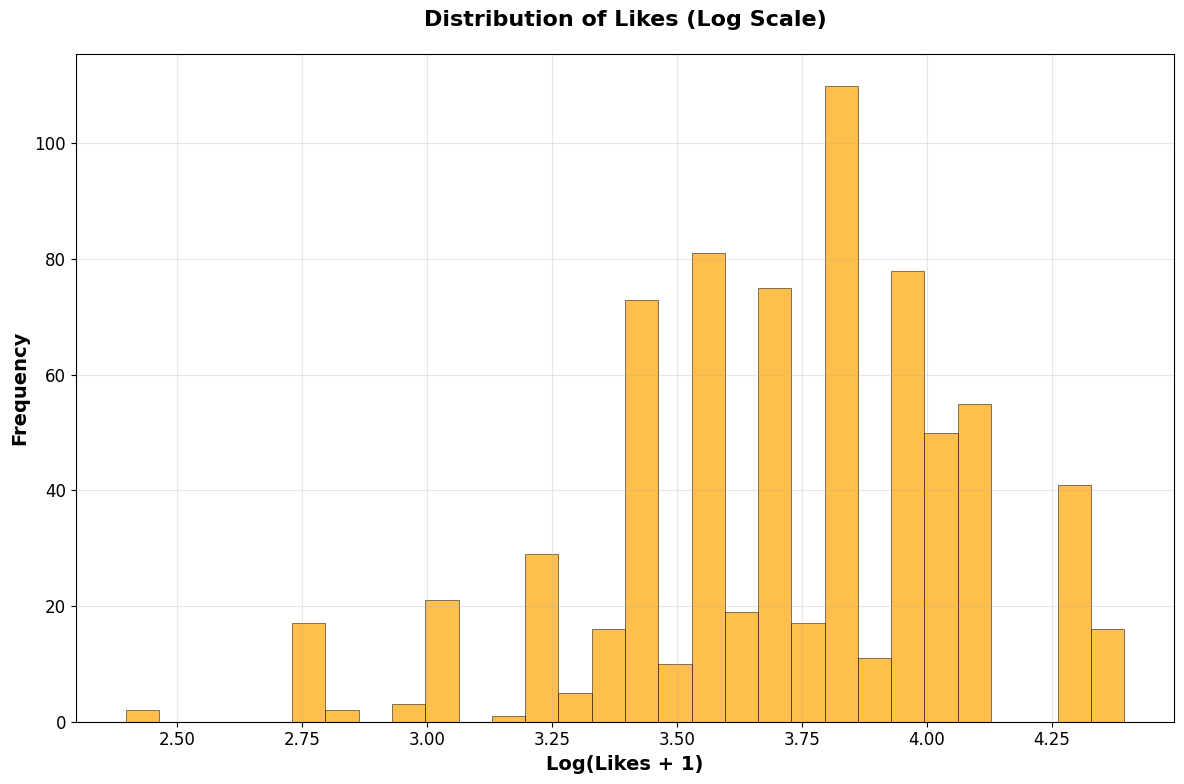

In [33]:
# 7. HISTOGRAM: Distribution of Likes with better bins (IMPROVED)
plt.figure(figsize=(12, 8))
# Use log scale for better visualization of skewed data
plt.hist(np.log1p(df['Likes'].dropna()), bins=30, alpha=0.7,
         color='Orange', edgecolor='black', linewidth=0.5)

plt.title('Distribution of Likes (Log Scale)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Log(Likes + 1)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('likes_distribution_improved.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 1400x1000 with 0 Axes>

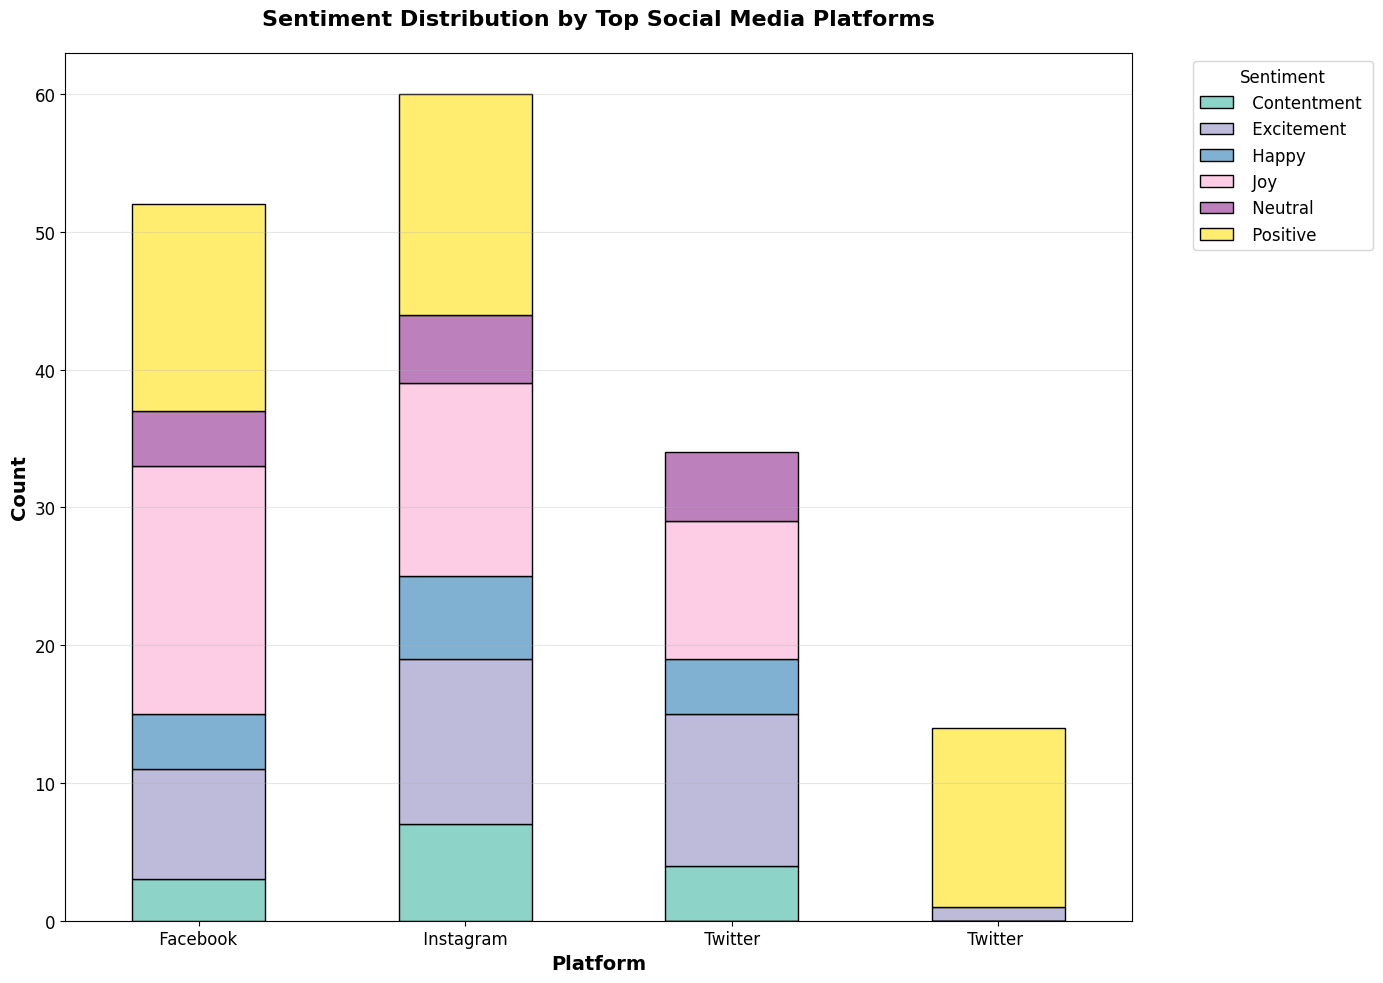

In [30]:
# 8. STACKED BAR: Sentiment by Top Platforms (IMPROVED)
plt.figure(figsize=(14, 10))
top_platforms = df['Platform'].value_counts().head(4).index
filtered_df = df[df['Platform'].isin(top_platforms)]
top_sentiments_platform = filtered_df['Sentiment'].value_counts().head(6).index
filtered_df = filtered_df[filtered_df['Sentiment'].isin(top_sentiments_platform)]

platform_sentiment = filtered_df.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)
platform_sentiment.plot(kind='bar', stacked=True, figsize=(14, 10),
                       colormap='Set3', edgecolor='black')

plt.title('Sentiment Distribution by Top Social Media Platforms',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Platform', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Sentiment')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('sentiment_by_platform_improved.png', dpi=300, bbox_inches='tight')
plt.show()

In [31]:
# Print comprehensive insights
print("\n" + "="*60)
print("COMPREHENSIVE DATA INSIGHTS")
print("="*60)
print(f"Total records: {len(df):,}")
print(f"Number of unique sentiments: {df['Sentiment'].nunique()}")
print(f"Most common sentiment: {df['Sentiment'].mode().values[0]}")
print(f"Average likes per post: {df['Likes'].mean():.2f}")
print(f"Average retweets per post: {df['Retweets'].mean():.2f}")
print(f"Date range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")
print(f"Top 5 sentiments: {list(sentiment_counts.head(5).index)}")
print(f"Top 3 platforms: {list(df['Platform'].value_counts().head(3).index)}")

# Correlation insights
corr_retweets_likes = df['Retweets'].corr(df['Likes'])
print(f"\nCorrelation between Retweets and Likes: {corr_retweets_likes:.3f}")


COMPREHENSIVE DATA INSIGHTS
Total records: 732
Number of unique sentiments: 279
Most common sentiment:  Positive  
Average likes per post: 42.90
Average retweets per post: 21.51
Date range: 2010-05-15 15:30:00 to 2023-10-22 20:45:00
Top 5 sentiments: [' Positive  ', ' Joy ', ' Excitement ', ' Happy ', ' Neutral ']
Top 3 platforms: [' Instagram ', ' Facebook ', ' Twitter ']

Correlation between Retweets and Likes: 0.998
